<p style="background:#BF4F51; color:white; font-size: 2.1em; text-align:center"> 
    <br><br><b> COVID-19 Dataset Analysis<br>
    <br>in South Korea</b> <br><br>
    - Exploratory Data Analysis -<br><br>
</p>

<p style="text-align: right;">Module 1: Data Wrangling with Python<br>
Capstone Project<br>
Author : Renato Mariano</p>

<h2 style="color:#BF4F51">Introduction </h2>

This project is based on a dataset from Kagle of Coronovirus cases in South Korea.The scraped data is available on https://www.kaggle.com/datasets/kimjihoo/coronavirusdataset. <br><br>
The scope of this project includes:
- Load the data using Pandas.
- Perform data cleaning.
- Raise important questions.
- Perform Exploratory Data Analysis (EDA).
- Answer the proposed questions through the data analysis.

<h3 style="color:#BF4F51">Data Description </h3>

- Dataset provided by the KCDC (Korea Centers for Desease Control & Prevention) and local governments.
- Dataset is made of <b>12 dataframes</b>.
- PatientRoute is not available anymore due to data privacy.

- The data was collected from <b>20/01/2020 and 30/06/2020</b>
- <b>Some discrepancies</b> can be found by comparing some of the dataframes (i.e. the infection cases are much higher in the cases table then in PatientInfo).


<h3 style="color:#BF4F51">Dataset Structure </h3>

- Datasets with the same colors share some properties.
- Lines represent shared values, if dashed the relevance of this sharing is low. <br><br>
<img src="images/dataset_structure.png" width=1100>

Source: https://www.kaggle.com/code/kimjihoo/ds4c-what-is-this-dataset-detailed-description/notebook

<h3 style="color:#BF4F51">Questions </h3>

**The following questions based this analysis:**
   
   1. Are there correlations between the number of deceaded people and the number of infections?
   2. How is the data temporally distributed?
   3. Was there in impact of social policies on the spread of the desease?
   4. What are the most susceptible groups of people to contract (or die from) COVID?
   5. What provinces had the highest number of cases? Do they correlate to the population?
   6. What is the average number of days in hospital for COVID-19 patient to be released (or die)?

<h2 style="color:#BF4F51">Imports and Data Loading </h2>

In [1]:
import pandas as pd
import glob
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import folium
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

from datetime import date
from sklearn.preprocessing import MinMaxScaler
import warnings

from suplement_functions import (
    grouped_plots,
    set_month_tick,
    clear_barplot,
)

In [2]:
warnings.filterwarnings('ignore')

from IPython.core.display import HTML      # center plots in the notebook
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

>All the dataframes will be recieve by one dictionary which keys are the dataframes' names.

In [3]:
# Get list of CSV files
dir_path = r"C:/Users/renat/TCProjects/M1_Capstone/COVID_data_Korea_modif"
csv_files = glob.glob(dir_path + "/*.csv")

df_dict = {}

for file in csv_files:
    temp_df = pd.read_csv(file)
    df_dict[file[61:-4]] = temp_df
df_dict.keys()

dict_keys(['Case', 'PatientInfo', 'Policy', 'Region', 'SearchTrend', 'SeoulFloating', 'Time', 'TimeAge', 'TimeGender', 'TimeProvince', 'Weather'])

>So the reference to a dataframe can be done directly as a dictionary, i.e. df_dict['PatientInfo']

>Hier additional non-COVID data of Population will also be loaded.

In [4]:
population_df = pd.read_csv(r"C:/Users/renat/TCProjects/M1_Capstone/non_Covid19_data/Population_province_2021.csv")
population_df.head(2)

province  total population     male   female
0    Seoul           9472127  4584251  4887876
1    Busan           3324335  1624745  1699590

<h2 style="color:#BF4F51">Data Preprocessing </h2>

**The preprocessing of the data was carried out in a different Notebook called: 02_COVID_Korea_preprocessing**<br><br>
It includes:
- Handling missing values.
- Removing duplicates.
- Droping non-necessary columns.
- Treating/Acknoledging the outliers. 
- Analysis of data types. <br><br>

The conversion of data types was performed directly in this notebook when needed.

<h2 style="color:#BF4F51">Exploratory Data Analysis </h2>

<h3 style="color:#BF4F51">Time Series Dataframes</h3>

Conversion of the date columns and set of them as index.

In [5]:
def organize_date(df):
    '''This function makes the convertion of the date column, set date as index'''
    df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
    df.set_index("date", inplace=True)
    return df

In [6]:
time_df = organize_date(df_dict["Time"])
time_age = organize_date(df_dict["TimeAge"])
time_gender = organize_date(df_dict["TimeGender"])
time_province = organize_date(df_dict["TimeProvince"])

In [7]:
time_df.head()

test  negative  confirmed  released  deceased
date                                                     
2020-01-20     1         0          1         0         0
2020-01-21     1         0          1         0         0
2020-01-22     4         3          1         0         0
2020-01-23    22        21          1         0         0
2020-01-24    27        25          2         0         0

<h4 style="color:#BF4F51">Correlation analysis</h4>

The aim of this section is to get insights about the relationships between the different features in the <b>"Time"</b> dataframe. How do they correlate?

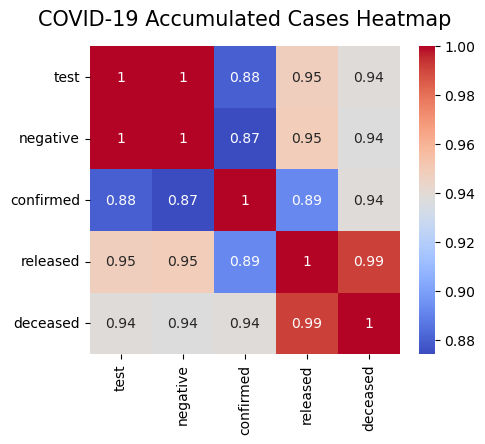

In [8]:
plt.figure(figsize=(5, 4))
sns.heatmap(time_df.corr(), annot=True, cmap="coolwarm").set_title(
    "COVID-19 Accumulated Cases Heatmap", fontdict={"fontsize": 15}, pad=15
);

- As observed in the heatmap, all of these features are highly correlated. <br>
- As expected, the number of deceased people is also very correlated to the total infection cases.

<h4 style="color:#BF4F51">Temporal distribution patterns</h4>

How was the spread of the infection? How did people behave during this time?

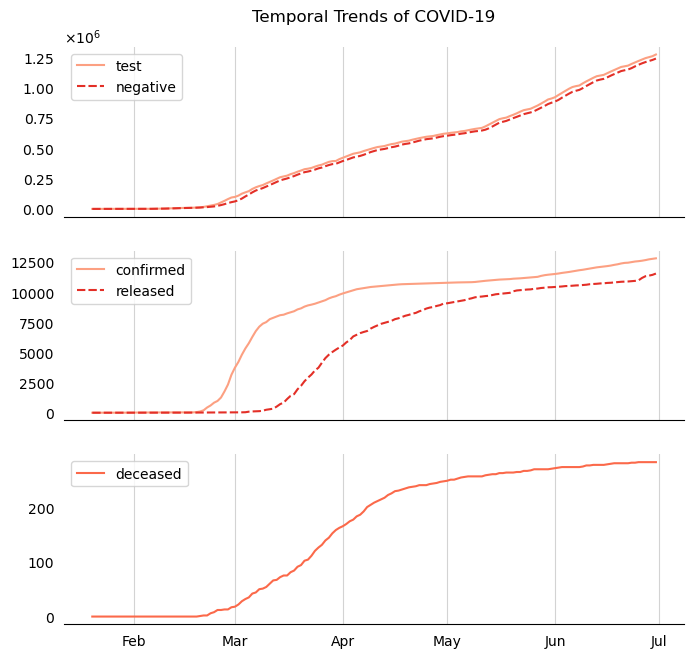

In [9]:
columns = [["test", "negative"], ["confirmed", "released"], ["deceased"]]
fig, ax = plt.subplots(3, sharex="col", sharey="row", figsize=(8, 7.5))

for i, column in enumerate(columns):
    sns.lineplot(data=time_df[column], ax=ax[i], palette="Reds")

ax[0].set(title="Temporal Trends of COVID-19\n")
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

grouped_plots(ax)
set_month_tick()

This answers to the question 'How is the data temporally distributed?' and shows that:

<p style = "background:	#f6eeee; color:black">
    <b>Confirmed cases<br></ b>
    - Until the end of February the infection was not very spread (3150 infection cases)<br>
    - An exponential growth can be seen in this curve.<br>
    - The curve growth peak is reach in the beginning of April. <br>
    - From this time, the increase in cases seems to be controlled (Population behaviour change !?).<br>
</p>

<p style = "background:	#f6eeee; color:black">
    <b>Released cases<br></ b>
    - Exponential increase.<br>
    - Towards beginning of the infection, there is a time gap of about 3 weeks between this curve and the confirmed cases curve.
</p>

<p style = "background:	#f6eeee; color:black">
    <b>Tests/Negative results<br></ b>
    - From end of March, there is a linear increase in the testing and negative results for the desease (Awareness increse).<br>
    - In the middle of May the growth of this line increases strongly (behaviour change). <br>
</p>

<p style = "background:	#f6eeee; color:black">
    <b>Deceased cases<br></ b>
    - Exponential curve.<br>
    - Reduction of the curves growth in mid-April (225 deaths by 15/04/2020).<br>
</p>

<h3 style="color:#BF4F51">Social policy implications on the temporal distribution</h3>

Was there an impact in the confirmed cases caused by social policy measures?

In [10]:
policy_df = df_dict['Policy']
policy_df.set_index("policy_id", inplace=True)

# Dates into DateTime format
policy_df["start_date"] = pd.to_datetime(policy_df["start_date"], format="%Y-%m-%d")
policy_df["end_date"] = pd.to_datetime(policy_df["end_date"], format="%Y-%m-%d")

In [ ]:
#policy_df.tail()

In [11]:
policy_df.groupby('type').count()[['gov_policy']]

gov_policy
type                      
Administrative           3
Alert                    4
Education               15
Health                  10
Immigration             15
Social                   5
Technology               6
Transformation           3

We see here, among others Social, Administrative and Immigration policies. Social policies are for this analysis maybe the most interesting since they show an obligation/advice for behaviour change.

In [12]:
policy_df[policy_df['type']=='Social']

country    type                  gov_policy  \
policy_id                                               
29          Korea  Social  Social Distancing Campaign   
30          Korea  Social  Social Distancing Campaign   
31          Korea  Social  Social Distancing Campaign   
32          Korea  Social  Social Distancing Campaign   
33          Korea  Social   Thanks to Challenge korea   

                                detail start_date   end_date  
policy_id                                                     
29                              Strong 2020-02-29 2020-03-21  
30                              Strong 2020-03-22 2020-04-19  
31                                Weak 2020-04-20 2020-05-05  
32                           Weak(1st) 2020-05-06        NaT  
33         Relay Cheer Campaign in SNS 2020-04-16        NaT

How did these social distancing measures impacted the spread of the desease?

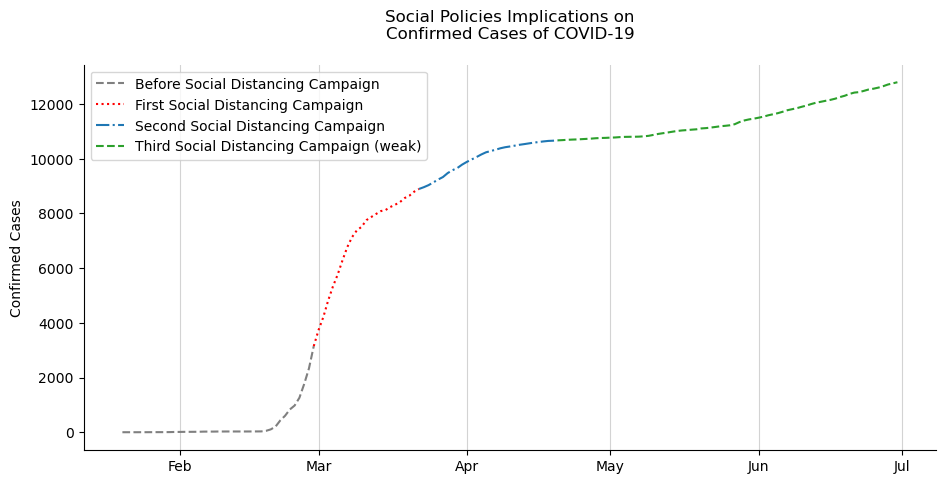

In [13]:
# recieve the dates of Social Distancing Campaigns
social_policy_dates = policy_df[policy_df["type"] == "Social"]["start_date"]

plt.figure(figsize=(11, 5))
fig = sns.lineplot(
    data=time_df["confirmed"].loc[: social_policy_dates.iloc[0]],
    color="grey",
    linestyle="--",
    label="Before Social Distancing Campaign",
).set(
    title="Social Policies Implications on\nConfirmed Cases of COVID-19\n",
    ylabel="Confirmed Cases",
    xlabel=" ",
)

sns.lineplot(
    data=time_df["confirmed"].loc[
        social_policy_dates.iloc[0] : social_policy_dates.iloc[1]
    ],
    color="red",
    linestyle=":",
    label="First Social Distancing Campaign",
)
sns.lineplot(
    data=time_df["confirmed"].loc[
        social_policy_dates.iloc[1] : social_policy_dates.iloc[2]
    ],
    color="tab:blue",
    linestyle="-.",
    label="Second Social Distancing Campaign",
)
sns.lineplot(
    data=time_df["confirmed"].loc[social_policy_dates.iloc[2] :],
    color="tab:green",
    linestyle="--",
    label="Third Social Distancing Campaign (weak)",
)

sns.despine()
plt.grid(visible=True, axis="x", color="lightgrey")

set_month_tick()

<p style = "background:	#f6eeee; color:black">
    - About 2 weeks after the implemention of the 1st Social Distancing Measure the curve growth changes.<br>
    - The 2nd Measure also present some change in the growth of the desease (also 2 weeks after).<br>
    - After the relaxation with the 3rd measures, the number of cases start to grow again, but now in a more linear growth.
</p>

<h3 style="color:#BF4F51">Patients Characteristics</h3>

The aim of this section is to get insights on patients patterns. Do Age Group / Gender influence the number of infected / deceased patients?

**Age Group**

In [14]:
# Percentage of deceaded people in relation to confirmed
percentage_deceaded = round(100*time_age.tail(9)['deceased']/time_age.tail(9)['confirmed'],1).tolist()
percentage_deceaded = [f"{x}%" for x in percentage_deceaded]

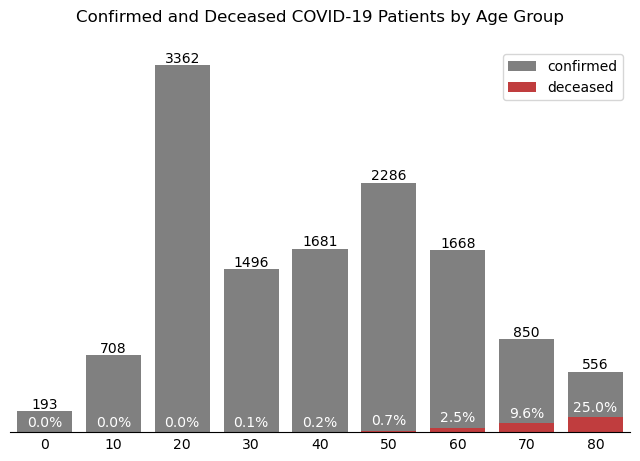

In [15]:
fig, ax1 = plt.subplots(figsize=(8, 5))

sns.barplot(
    x="Age",
    y="Value",
    hue="Variable",
    palette=['grey', 'tab:red'],
    data=time_age.tail(9).melt(id_vars="age").rename(columns=str.title),
    ax=ax1,
    dodge=False,
)

sns.despine(left=True)
ax1.tick_params(axis='both', which='both', length=0)

# Add labels to the graph
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1], padding=2, labels=percentage_deceaded, color='white')
#ax1.bar_label(ax1.containers[1], padding=2, color='white')

clear_barplot("Confirmed and Deceased COVID-19 Patients by Age Group\n")

<p style = "background:	#f6eeee; color:black">
    - Confirmed cases were much higher among the people on their 20s, followed by the ones on their 50s.<br>
    - Can this be explained by the demografics of the country?<br><br>
    - The number of deceaded clearly increases with age.<br>
    - 25% of the elderly in their 80s who contracted COVID died.
</p>


**Population Pyramid in South Korea 2020**

<center>
<img src="images/population_pyramid_2020.png" width=520>
</center>

Source: https://www.populationpyramid.net/republic-of-korea/2020/

<p style = "background:	#f6eeee; color:black">
    - The population major group is on their 50s (2nd rank in number of COVID cases)<br>
    - The boom of cases in the Age Group of 20s cannot be explained by demographs.<br>
    - An assumption is that people at younger age took less precaution measures, or had to maintain their normal activities at work/studies.
</p>


**Gender**

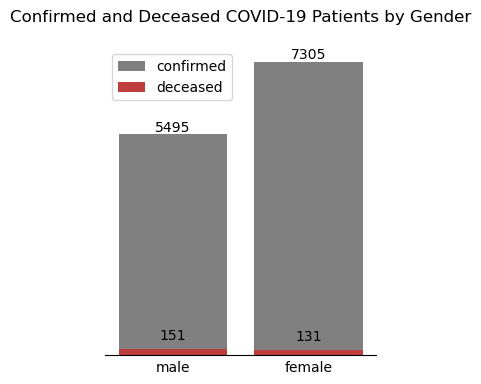

In [16]:
fig, ax1 = plt.subplots(figsize=(3.5, 4))

sns.barplot(
    x="Sex",
    y="Value",
    hue="Variable",
    palette=['grey', 'tab:red'],
    data=time_gender.tail(2).melt(id_vars="sex").rename(columns=str.title),
    ax=ax1,
    dodge=False,
)

sns.despine(left=True)
ax1.tick_params(axis='both', which=u'both', length=0)
ax1.bar_label(ax1.containers[0])
ax1.bar_label(ax1.containers[1], padding=5)

clear_barplot("Confirmed and Deceased COVID-19 Patients by Gender\n")

In [17]:
print(f"- {100*(7305/5495-1):.0f}% more females contracted COVID in the evaluated timeframe.\n")
print(f"- The proportion of deceased males is {100*(151/5495-131/7305):.0f}% bigger than females.")

- 33% more females contracted COVID in the evaluated timeframe.

- The proportion of deceased males is 1% bigger than females.


<p style = "background:	#f6eeee; color:black">
    - As to observe in the demografics there is no significant change between men and women population in South Korea<br>
    - This proportion of deceaded males is not relevant since the sample is too small (282 deaths) and the proportion surpass too small. 
</p>

<h3 style="color:#BF4F51">Infection trends in provinces</h3>

The aim of this section is to get an overview of how the infection spread and how the people behaved during this time.

In [18]:
time_province.tail(3)

province  confirmed  released  deceased
date                                                       
2020-06-30  Gyeongsangbuk-do       1389      1328        54
2020-06-30  Gyeongsangnam-do        134       128         0
2020-06-30           Jeju-do         19        16         0

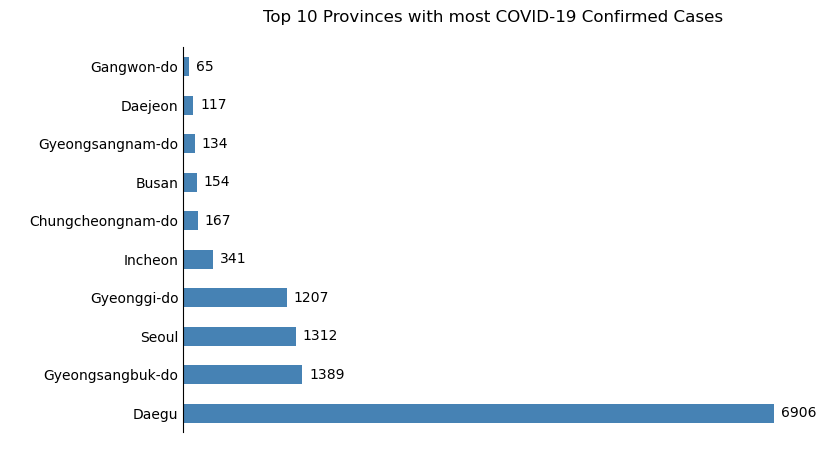

In [19]:
ax1 = time_province.tail(17).set_index("province")\
    .sort_values(by="confirmed", ascending=False)["confirmed"][0:10]\
    .plot(kind="barh", figsize=(8, 5), color='steelblue')

plt.xlabel(" ")
plt.ylabel(" ")
plt.xticks()
plt.title("Top 10 Provinces with most COVID-19 Confirmed Cases\n")

sns.despine(bottom=True)
ax1.tick_params(axis="both", which="both", length=0, labelbottom=False)
ax1.bar_label(ax1.containers[0], padding = 5);

<p style = "background:	#f6eeee; color:black">
    - In Daegu the confirmed cases are more than 5x higher than the province in 2nd place.<br>
    - What justify this much higher numbers in there? Is it conected to demographics?<br>
    - 4511 cases belongs to the Shincheonji Church, about 65% of the total cases in the province.
</p>

<h3 style="color:#BF4F51">Spatial distribution of the cases</h3>

Let's take a look at how these cases are distributed in the map of South Korea. <br>
For that we will merge the geographic data from <b>"Patient_info" and "Region".

In [20]:
def convert_date(col):
    '''This function makes the convertion of the date column'''
    col = pd.to_datetime(col, format="%Y-%m-%d")
    return col

In [21]:
patient_info = df_dict['PatientInfo']
patient_info.set_index("patient_id", inplace=True)

# Dates into DateTime format
patient_info["confirmed_date"] = convert_date(patient_info["confirmed_date"])
patient_info["released_date"] = convert_date(patient_info["released_date"])
patient_info["deceased_date"] = convert_date(patient_info["deceased_date"])

In [22]:
patient_info.head(2)

sex   age country province         city   infection_case  \
patient_id                                                              
1000000001  male  50.0   Korea    Seoul   Gangseo-gu  overseas inflow   
1000000002  male  30.0   Korea    Seoul  Jungnang-gu  overseas inflow   

           infected_by  contact_number symptom_onset_date confirmed_date  \
patient_id                                                                 
1000000001         NaN            75.0         2020-01-22     2020-01-23   
1000000002         NaN            31.0                NaN     2020-01-30   

           released_date deceased_date     state  
patient_id                                        
1000000001    2020-02-05           NaT  released  
1000000002    2020-03-02           NaT  released

In [23]:
region_df = df_dict['Region']
region_df.head(2)

code province        city   latitude   longitude  elementary_school_count  \
0  10000    Seoul       Seoul  37.566953  126.977977                      607   
1  10010    Seoul  Gangnam-gu  37.518421  127.047222                       33   

   kindergarten_count  university_count  academy_ratio  \
0                 830                48           1.44   
1                  38                 0           4.18   

   elderly_population_ratio  elderly_alone_ratio  nursing_home_count  
0                     15.38                  5.8               22739  
1                     13.17                  4.3                3088

In [24]:
patient_region = (
    patient_info[["province", "city", "confirmed_date"]]
    .reset_index()
    .merge(
        region_df[["province", "city", "latitude", "longitude"]],
        how="inner",
        on=["province", "city"],
    )
    .set_index(patient_info.index.names)
)
patient_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 1000000001 to 7000000019
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   province        5040 non-null   object        
 1   city            5040 non-null   object        
 2   confirmed_date  5040 non-null   datetime64[ns]
 3   latitude        5040 non-null   float64       
 4   longitude       5040 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 236.2+ KB


> - As we can see in here, the merge of "Patient_info" and "Region" provides 5040 cases with valid location.
> - This represents a much shorter number of cases than we observe in the temporal dataframes (12800; 12076 for TimeProvince)
> - Let's plot this in the map of South Korea and observe the distribution.

**Map with data from Patient_info**

In [25]:
korea_map = folium.Map(location=[36, 127.5], zoom_start=7)

# Create a list of lists with geographical data
geo_data = [[row['latitude'],row['longitude']] for index, row in patient_region[['latitude','longitude']].iterrows()]

# Add content from data
MarkerCluster(geo_data, name="Clusters").add_to(korea_map) # Marker with count
HeatMap(geo_data, name="Heatmap").add_to(korea_map) #Heatmap

# Add South Korea map with english names
folium.TileLayer('cartodbpositron', name='South Korea Map', overlay=True).add_to(korea_map)

# Add switch between map and markers
folium.LayerControl().add_to(korea_map)

korea_map

> - There is a big gap of cases in the province of Daegu (Province with highest number of cases).
> - We will make a map with the data from TimeProvince to see how it changes.
> - The level of details of this map will be lower, since there will be only information about the provinces (and not cities).

**Map with data from TimeProvince (Scrapped from Cases)**

In [26]:
# Merge with geo values taken from the mode of each province
province_region = time_province.tail(17).merge(
    patient_region.groupby(["province"])["latitude", "longitude"].agg(pd.Series.mode),
    how="inner",
    on="province",
)
province_region = province_region.merge(
    population_df[["province", "total population"]], how="inner", on="province"
)

# Create a column with the order of population
province_region['order_pop'] = province_region['total population'].rank(ascending=False).astype(int)

province_region.head()

province  confirmed  released  deceased   latitude   longitude  \
0    Seoul       1312       985         7  37.478290  126.951502   
1    Busan        154       142         3  35.205060  129.083673   
2    Daegu       6906      6700       189  35.830128  128.532635   
3  Incheon        341       290         1  37.507031  126.721804   
4  Gwangju         44        32         0  35.160467  126.851392   

   total population  order_pop  
0           9472127          2  
1           3324335          3  
2           2387911          7  
3           2957044          5  
4           1475262         14

In [27]:
# Preparation of data for map
# list for heatmap
heat_data = province_region[['latitude', 'longitude', 'confirmed']].values.tolist()

# list for markers
geo_repeated = []
for i in province_region.index:
    geo_repeated.extend([[province_region['latitude'][i],province_region['longitude'][i]]] * province_region['confirmed'][i])

In [28]:
# create a map centered on South Korea
korea_map_province = folium.Map(location=[36.5, 127.5], zoom_start=7)

# Add content from data
HeatMap(heat_data, name="Heatmap", radius=35).add_to(korea_map_province) # Heatmap
MarkerCluster(geo_repeated, name="Clusters").add_to(korea_map_province) # Marker with count

# Feature group for Population bars
bars = folium.FeatureGroup(name="Population")

# Add population data to the map
for index, row in province_region.iterrows():
    folium.Rectangle(
        bounds=[
            [row['latitude']-0.05, row['longitude']-0.05], 
            [row['latitude']+row['total population']/9000000, row['longitude']+0.05]
        ],
        fill=True,
        fill_color='black',
        fill_opacity=0.3,
        width=50000,
        weight=1,
        tooltip=f"{row['province']} : {str(row['total population'])} - Placed as {row['order_pop']} in population"
    ).add_to(bars)

# Bars
korea_map_province.add_child(bars)

# Add map with english names
folium.TileLayer('cartodbpositron', name='South Korea Map', overlay=True).add_to(korea_map_province)

# Add switch between map and markers
folium.LayerControl().add_to(korea_map_province)

korea_map_province

> - The highest amount of cases, are in the Province of Daegu, placed as the 7th largest in population.
> - As reported in the media, in the beginning of the infection Daegu became one of the largest epicenter of COVID-19 outside of China.
> - In relation to Daegu, the rest of South Korea seemed to still be controlled in cases of COVID.
> - We can say that the number of inhabitants and confirmed cases of COVID did not correlate, but we can still see this in correlation map.

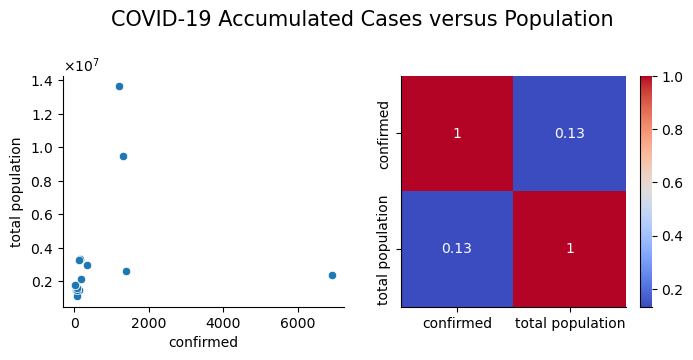

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))

sns.scatterplot(x=province_region['confirmed'], y=province_region['total population'], ax=ax[0])
sns.heatmap(province_region[['confirmed', 'total population']].corr(), annot=True, cmap="coolwarm", ax=ax[1])

fig.suptitle('COVID-19 Accumulated Cases versus Population', fontsize=15, y=1.10)
sns.despine()

ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0), useMathText=True)

> - As validated in the map there is no correlation between the number of cases and the population in south korea.
> - If the outlier was removed this correlation would only slightly increase.

<h3 style="color:#BF4F51">Average Patient Release and Death Time</h3>

In [30]:
patient_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5165 entries, 1000000001 to 7000000019
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sex                 4043 non-null   object        
 1   age                 3785 non-null   float64       
 2   country             5165 non-null   object        
 3   province            5165 non-null   object        
 4   city                5165 non-null   object        
 5   infection_case      5165 non-null   object        
 6   infected_by         1346 non-null   object        
 7   contact_number      784 non-null    float64       
 8   symptom_onset_date  690 non-null    object        
 9   confirmed_date      5165 non-null   datetime64[ns]
 10  released_date       1587 non-null   datetime64[ns]
 11  deceased_date       66 non-null     datetime64[ns]
 12  state               5165 non-null   object        
dtypes: datetime64[ns](3), float64(2),

In [31]:
patient_info['days_released'] = (patient_info['released_date'] - patient_info['confirmed_date']).dt.days
patient_info[patient_info['days_released'] < 0] = None
print(f"{100*(patient_info['days_released'].isnull().sum()/patient_info.shape[0]):.0f}% of the release data is null")

69% of the release data is null


In [32]:
patient_info['days_deceased'] = (patient_info['deceased_date'] - patient_info['confirmed_date']).dt.days
patient_info[patient_info['days_deceased'] < 0] = None
print(f"{100*(patient_info['days_deceased'].isnull().sum()/patient_info.shape[0]):.0f}% of the deceased data is null")

99% of the deceased data is null


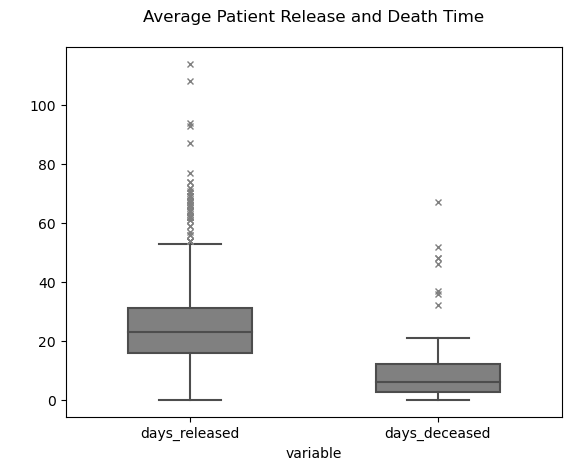

In [33]:
sns.boxplot(
    x="variable",
    y="value",
    data=pd.melt(patient_info[["days_released", "days_deceased"]]),
    color="grey",
    width=0.5,
    flierprops=dict(marker='x', markerfacecolor='None', markersize=4,  markeredgecolor='grey'),
);

plt.ylabel(" ")
plt.title("Average Patient Release and Death Time\n");

In [34]:
print(f"The average release time for a pacient was {patient_info['days_released'].mean():.0f} days")
print(f"The average decease time for a pacient was {patient_info['days_deceased'].mean():.0f} days")

The average release time for a pacient was 25 days
The average decease time for a pacient was 11 days


> - This analysis may not reflect reality due to the fact they don't represent a big part of the data (only 30% for released and 1% for deceaded).
> - The boxplots also shows that there is a great variability in the time for releasing a pacient or that took for a pacient to die.

<h2 style="color:#BF4F51">Conclusions</h2>

**1. Are there correlations between the number of deceaded people and the number of infections?**
 - All of the features exposed in the temporal data were very correlated (tests, negative tests, confirmed cases, released and deceaded patients). <br><br>

**2. How is the data temporally distributed?**
 - The temporal distribution showed that the number of cases grew exponentially from end of February until the beginning of April.<br><br>

**3. Was there in impact of social policies on the spread of the desease?**
 - The temporal analysis highlighted a very positive impact on the social policies on the control of COVID-19 cases in South Korea.
 - The effect of each social policy can be see very precisely on the temporal graph.<br><br>

**4. What are the most susceptible groups of people to contract (or die from) COVID?**
 - The most common patient of COVID-19 in South Korea was in their 20s. And this could not be explained by demographics. A valid explanation for that lies on the fact that this age group took less precaution measures, or had to maintain their normal activities at work/studies.
 - The rest of the age groups mimic very well the distribution of the population.
 - 33% more females were infected, which also is not explained by demographics.
 - The deaths of COVID increase with age. The proportion of deceaded people reached 25% by the age group on their 80s.<br><br>

**5. What provinces had the highest number of cases? Do they correlate to the population?**
 - The province of Daegu had the highest amount of cases being one of the largest epicenter of COVID-19 outside of China during the first months of the desease.
 - In Daegu, the number of cases reached almost 5x the number in the second province with most cases.
 - No correlation could be identified between number of cases and the population, which gives an idea that a good control was put in practice.<br><br>

**6. What is the average number of days in hospital for COVID-19 patient to be released (or die)?**
 - Patients stay in average 25 days in the hospital before being released (30% of the data valid)
 - The average deceasing time was 10 days (only 1% of the data valid).
 - This analysis for the deceased time should not be considered due to the low volume of valid data to support it.